# Can You Trust Your Fungus? A Python Exploration of Mushroom Edibility

Ever wondered if that wild mushroom you found is safe to eat? ️ In this Python project, we'll delve into the fascinating world of mushrooms and explore deep learning techniques to help us distinguish between edible and poisonous varieties.
  
---

## Step 1: Reading and understanding the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

`The whole dataset is categorical variables which means that we will not encouter outliers and no nulls in the dataset.`  

Lets take a quick look on the classes in each column.

In [6]:
for col in data.columns:
    print(data[col].value_counts())
    print('='*35,'\n')


e    4208
p    3916
Name: class, dtype: int64

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

f    4748
t    3376
Name: bruises, dtype: int64

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

f    7914
a     210
Name: gill-attachment, dtype: int64

c    6812
w    1312
Name: gill-spacing, dtype: int64

b    5612
n    2512
Name: gill-size, dtype: int64

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

t    4608
e    3516
Name: stalk-shape, dtype: int64

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

s    5176
k    2372
f     552
y      24
Name

In [7]:
list(data.columns)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

### Data Description

This dataset provide a detailed description of the physical characteristics and growing conditions of the mushrooms, which can be used to predict their edibility.



#### Here is what the columns describe:

**Classes (Target Variable):**

* Edible: E
* Poisonous: P

**Cap Features:**

* **Shape: This describes the general shape of the mushroom's cap**
    * Bell: B
    * Conical: C
    * Convex: X
    * Flat: F
    * Knobbed: K
    * Sunken: S
* **Surface: This indicates the texture of the cap's surface**
    * Fibrous: F
    * Grooves: G
    * Scaly: Y
    * Smooth: S
* **Color: This describes the color of the mushroom's cap**
    * Brown: N
    * Buff: B
    * Cinnamon: C
    * Gray: G
    * Green: R
    * Pink: P
    * Purple: U
    * Red: E
    * White: W
    * Yellow: Y

**Bruises: This could indicate whether the mushroom bruises or changes color when pressed or damaged.**

* True: T
* No: F

**Odor: This describes the smell of the mushroom**

* Almond: A
* Anise: L
* Creosote: C
* Fishy: Y
* Foul: F
* Musty: M
* None: N
* Pungent: P
* Spicy: S

**Gills:**

* **Attachment: This refers to how the gills (underside of the cap) are attached to the stalk**
    * Attached: A
    * Descending: D
    * Free: F
    * Notched: N
* **Spacing: This describes the closeness of the gills to each other**
    * Close: C
    * Crowded: W
    * Distant: D
* **Size: This indicates the width of the gills**
    * Broad: B
    * Narrow: N
* **Color: This describes the color of the mushroom's gills**
    * Black: K
    * Brown: N
    * Buff: B
    * Chocolate: H
    * Gray: G
    * Green: R
    * Orange: O
    * Pink: P
    * Purple: U
    * Red: E
    * White: W
    * Yellow: Y

**Stalk: These columns likely describe the shape, surface texture, and color of the mushroom's stalk in different sections.**

* **Shape:**
    * Enlarging: E
    * Tapering: T
* **Root:**
    * Bulbous: B
    * Club: C
    * Cup: U
    * Equal: E
    * Rhizomorphs: Z
    * Rooted: R
    * Missing: ?
* **Surface Above Ring:**
    * Fibrous: F
    * Scaly: Y
    * Silky: K
    * Smooth: S
* **Surface Below Ring:**
    * Fibrous: F
    * Scaly: Y
    * Silky: K
    * Smooth: S
* **Color Above Ring:**
    * Brown: N
    * Buff: B
    * Cinnamon: C
    * Gray: G
    * Orange: O
    * Pink: P
    * Red: E
    * White: W
    * Yellow: Y
* **Color Below Ring:**
    * Brown: N
    * Buff: B
    * Cinnamon: C
    * Gray: G
    * Orange: O
    * Pink: P
    * Red: E
    * White: W
    * Yellow: Y

**Veil:**

* **Type: This indicates the presence or absence of a veil (a thin membrane that covers the young mushroom) and its type**
    * Partial: P (The only type in the dataset)
    * Universal: U
* **Color: This describes the color of the veil, if present**
    * Brown: N
    * Orange: O
    * White: W
    * Yellow: Y

**Ring:**

* **Number: This refers to the number of rings present on the stalk.**
    * None: N
    * One: O
    * Two: T
* **Type: This describes the type of ring**
    * Cobwebby: C
    * Evanescent: E
    * Flaring: F
    * Large: L
    * None: N
    * Pendant: P
    * Sheathing: S
    * Zone: Z

**Spore Print Color: This indicates the color of the spores produced by the mushroom, typically a powder-like deposit.**

* Black: K
* Brown: N
* Buff: B
* Chocolate: H
* Green: R
* Orange: O
* Purple: U
* White: W
* Yellow: Y

**Population: This might describe the number of mushrooms growing together in a cluster.**

* Abundant: A
* Clustered: C
* Numerous: N
* Scattered: S
* Several: V
* Solitary: Y

**Habitat: This specifies the environment where the mushroom was found**

* Grasses: G
* Leaves: L
* Meadows: M
* Paths: P
* Urban: U
* Waste: W
* Woods: D


The features provided in the dataset is enough to study and predict our target variable, so there is no feature engineering step.

---

## Step 2: Exploratory Data Analysis

#### Seeing the proportion of every class in each categorical variable.

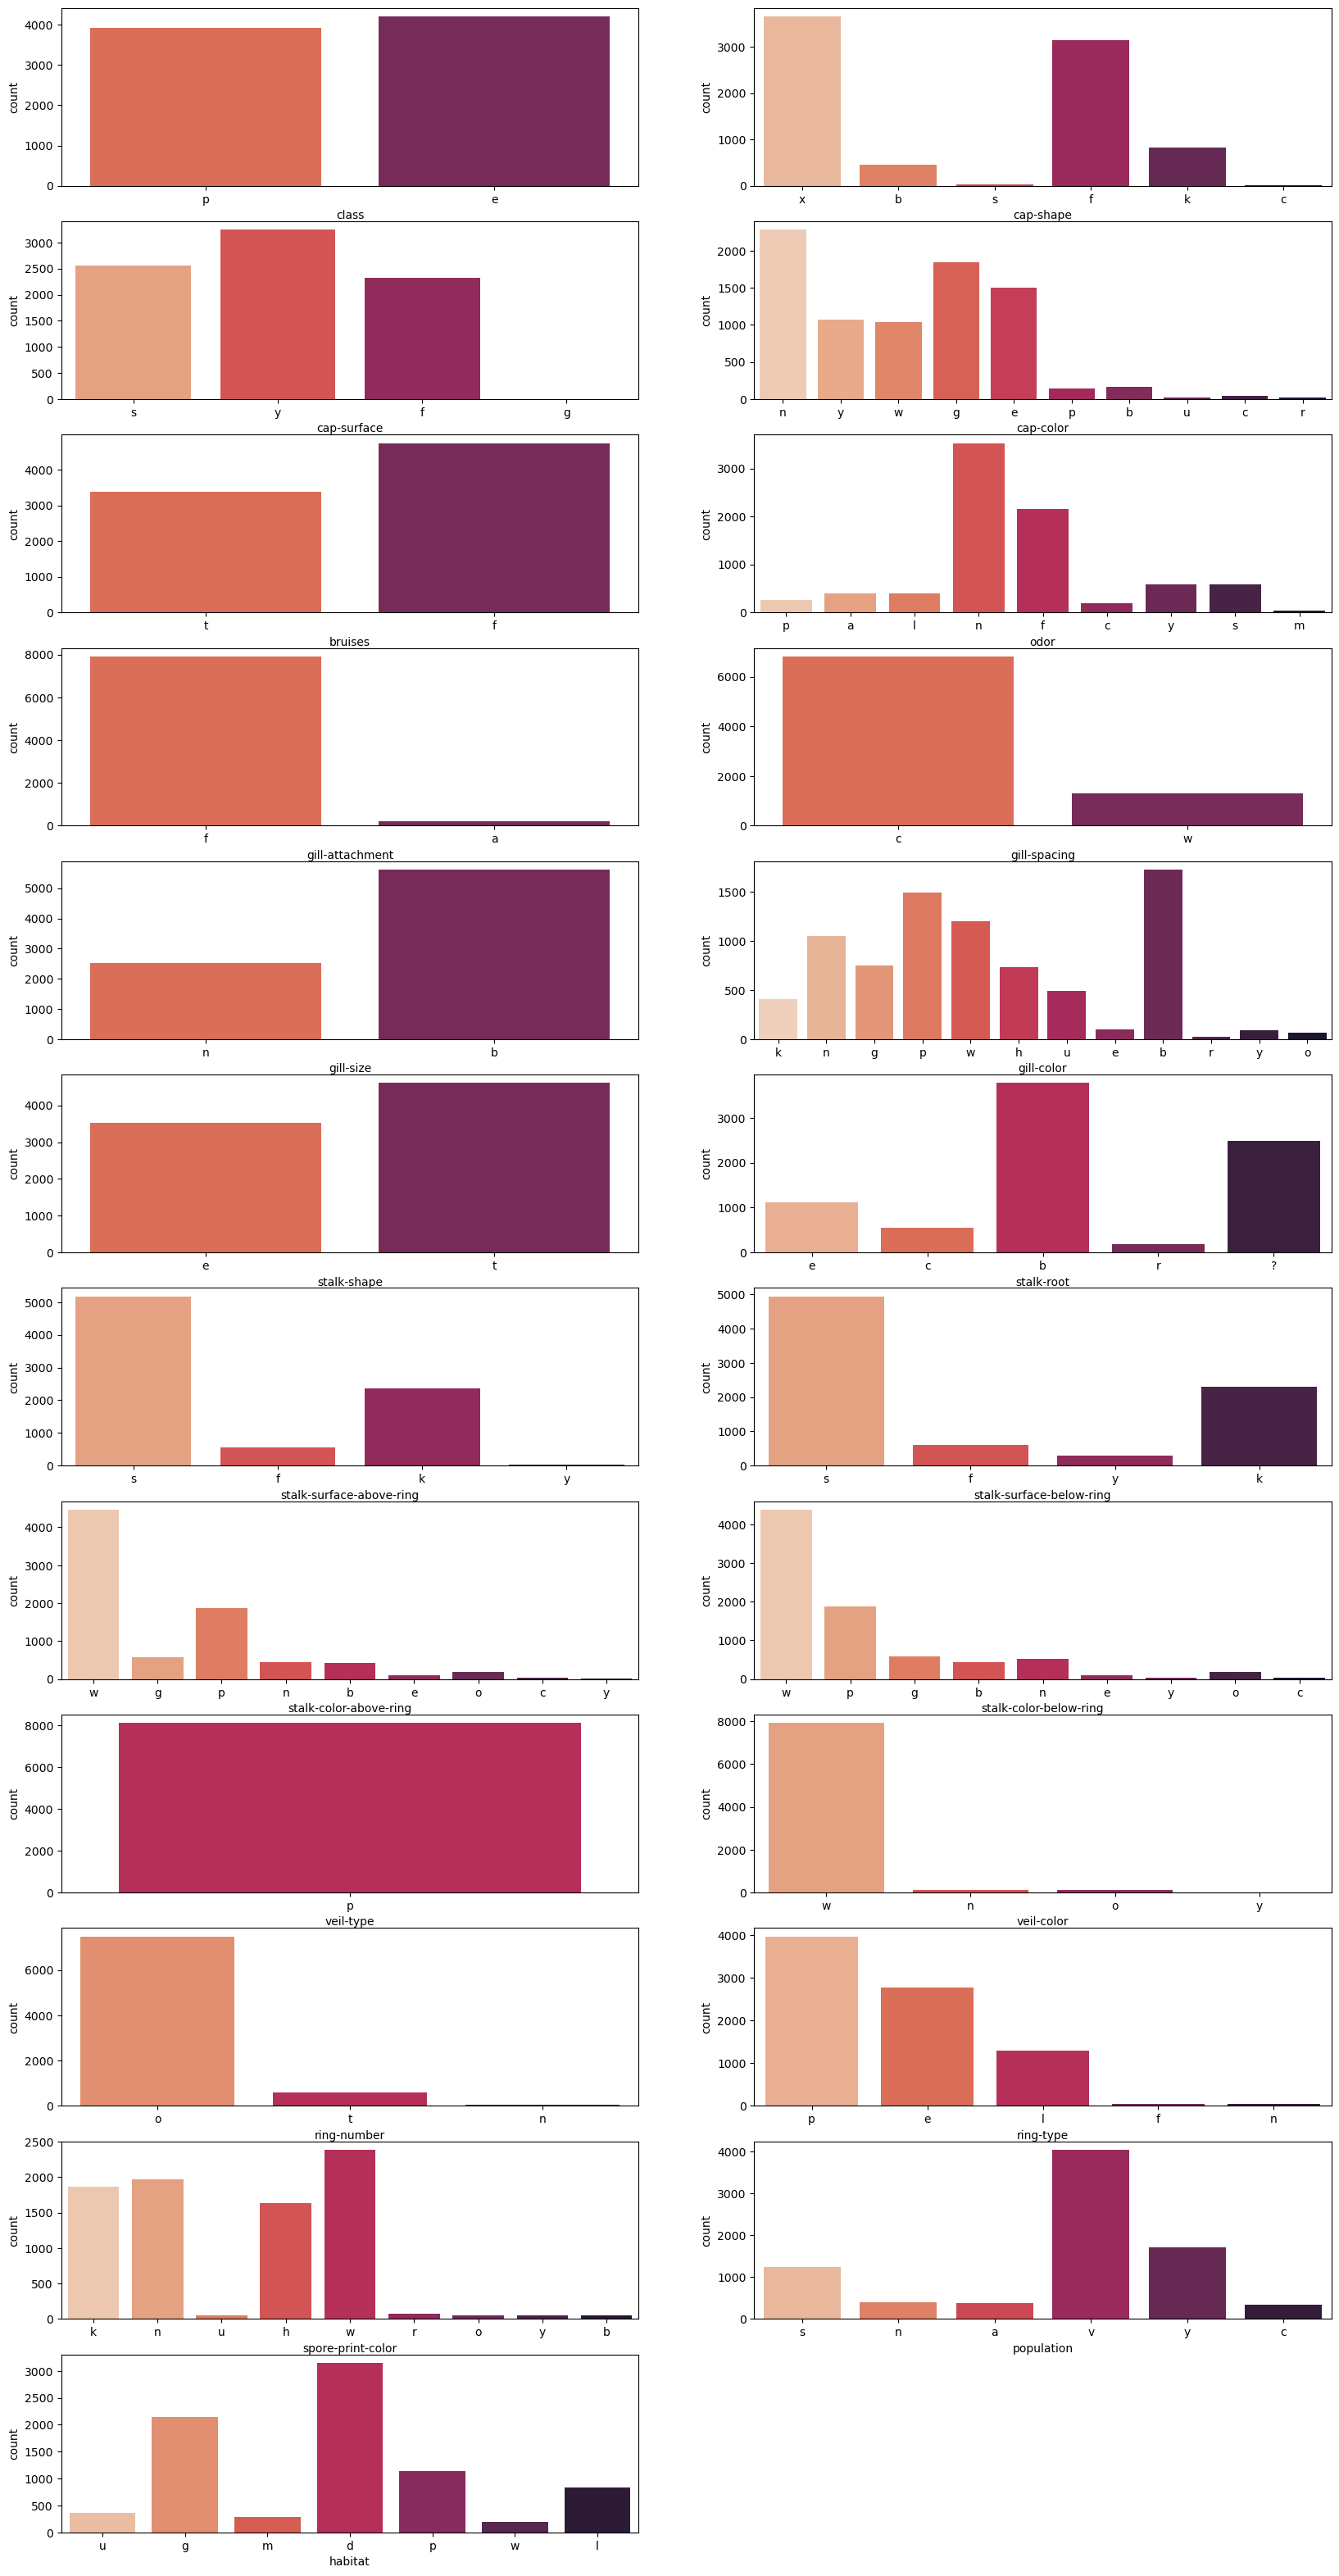

In [8]:
plt.figure(figsize=(20,40))
for i, col in enumerate(data.columns):
    ax = plt.subplot(12, 2, i+1)
    sns.countplot(x=data[col], ax=ax,palette='rocket_r')
    plt.xlabel(col)
        
plt.show()

We notice that the frequency of the labels in some classes like: cap, odor, gill ,stalk, viel, ring and spore are very rare compared to other labels in the same category.  
The question is: Are those labels with less frequency in the dataset crucial to know whether the mushroom is edible or not?

#### Checking the proportion of our target variable in each class

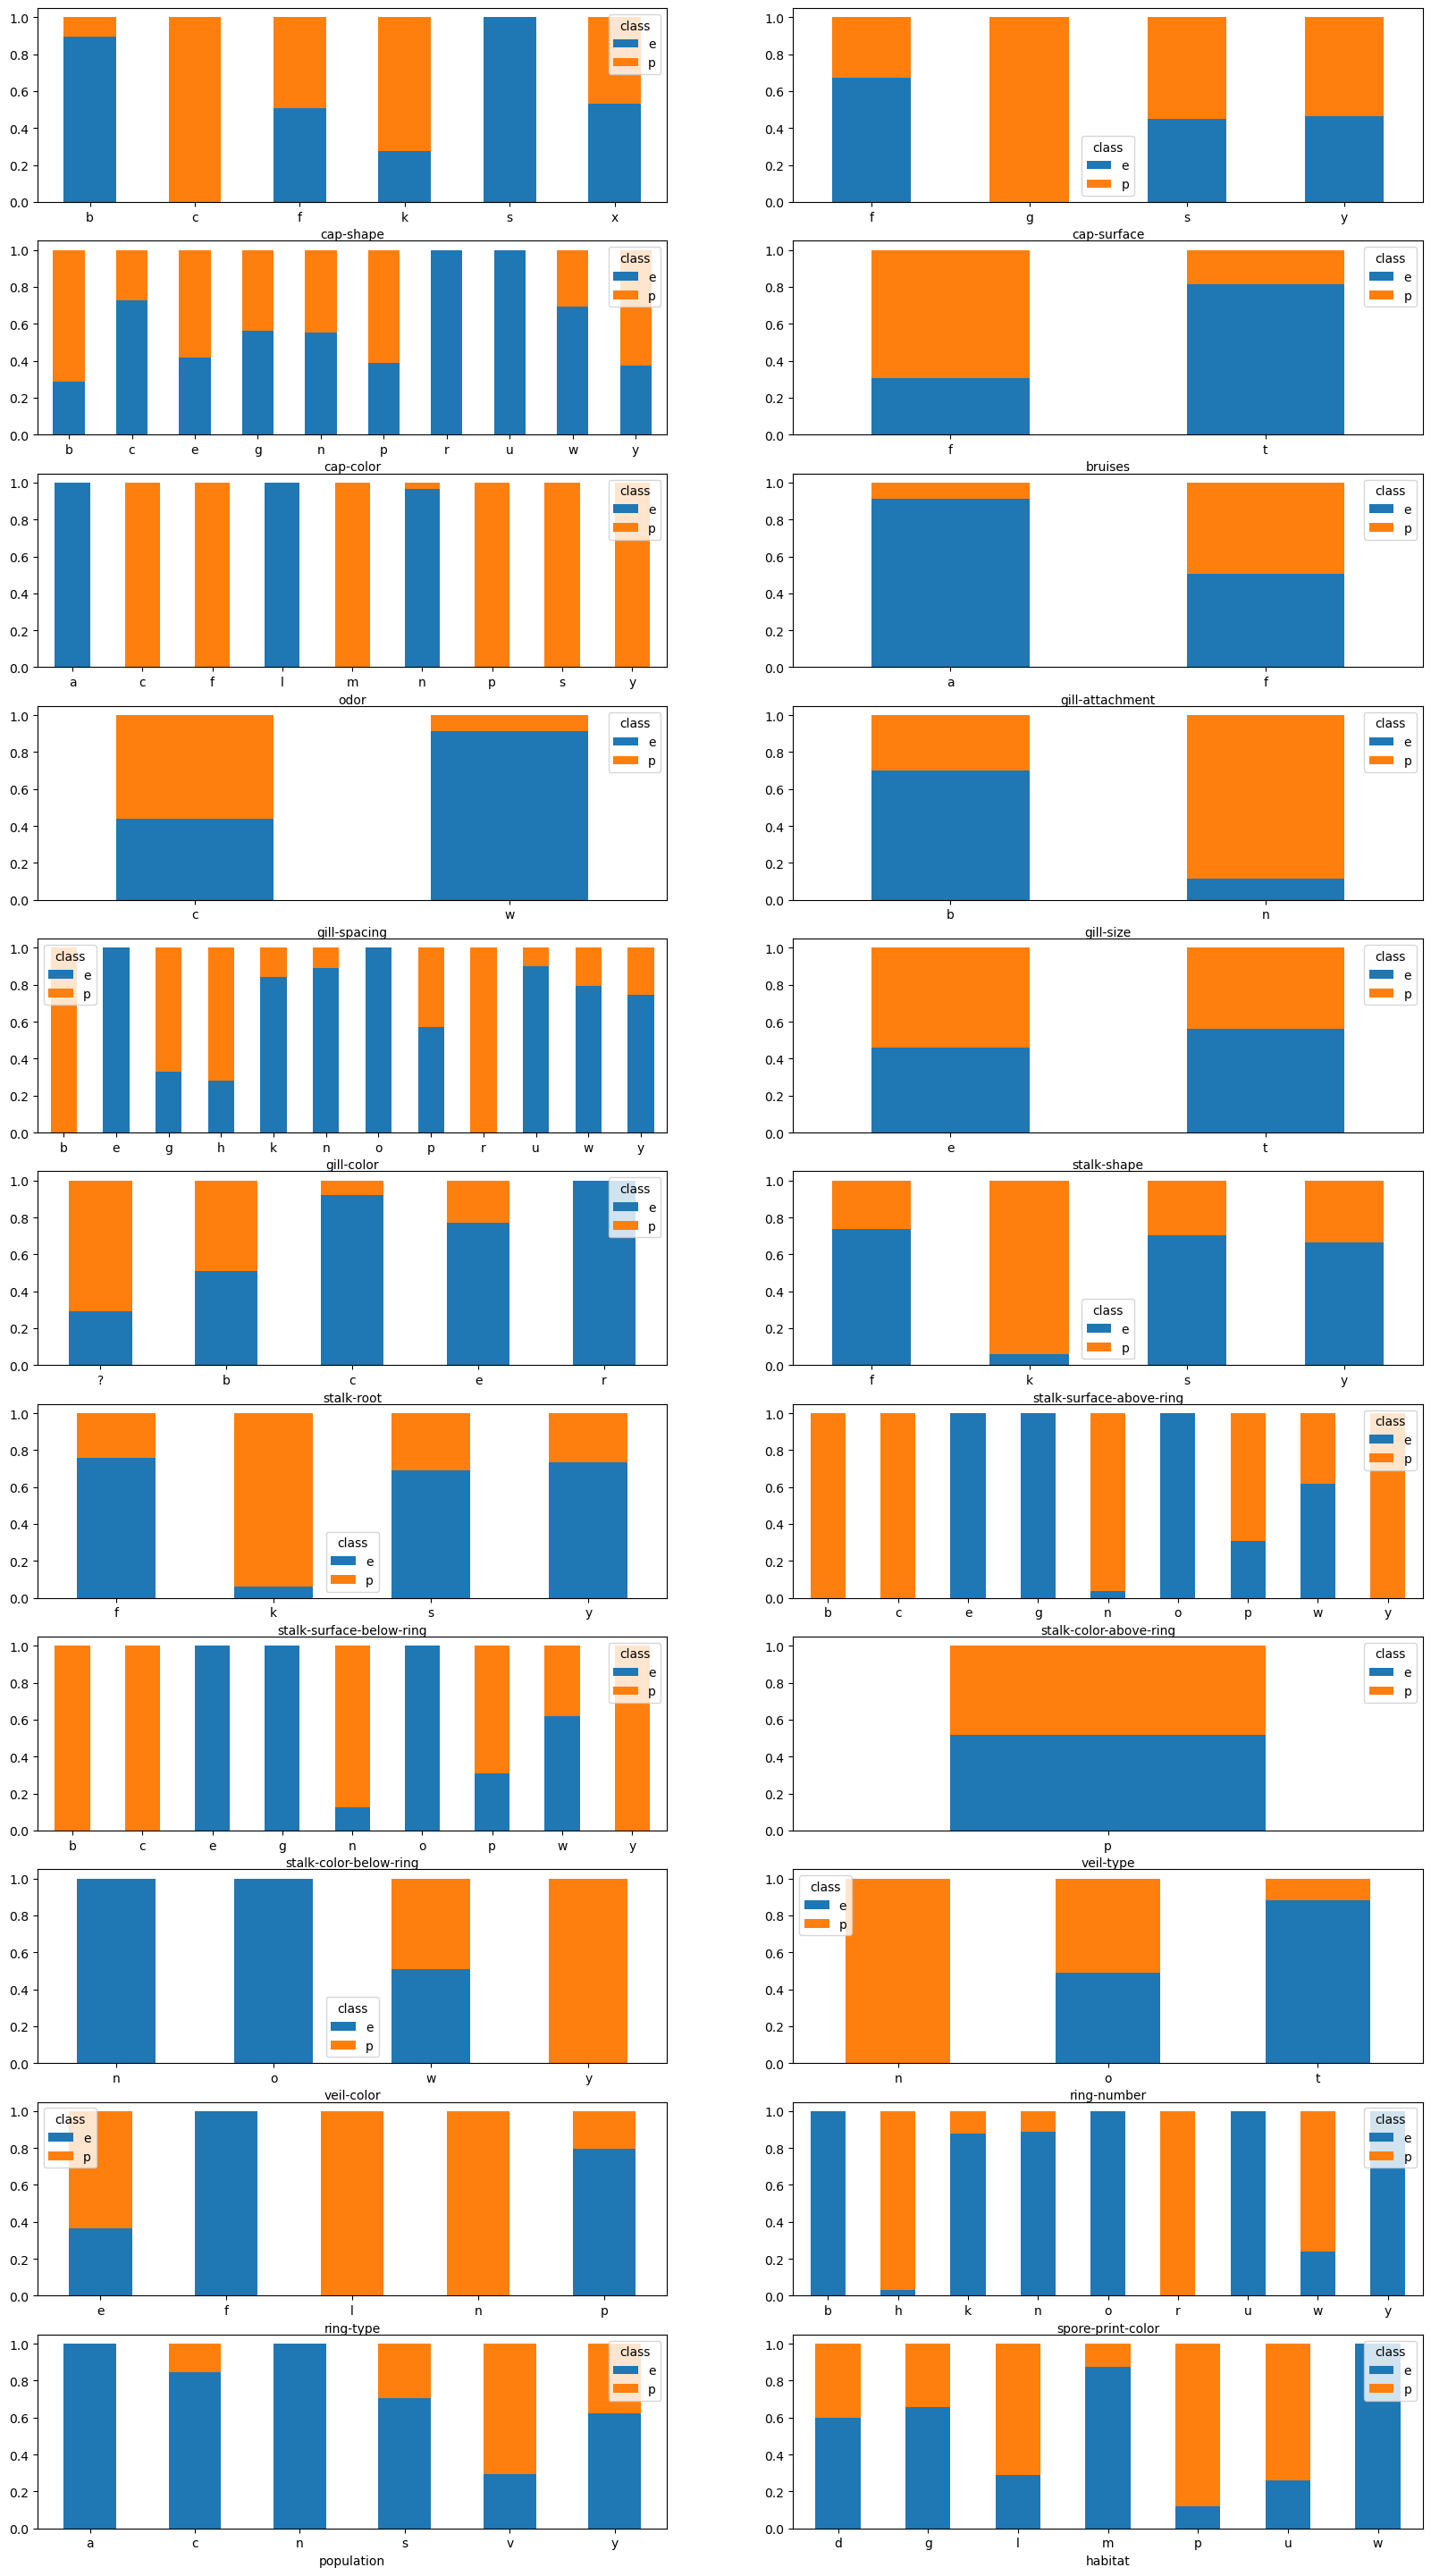

In [9]:
independent_vars = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type','spore-print-color','population','habitat']
plt.figure(figsize=(20,40))
for i, col in enumerate(independent_vars):
    ax = plt.subplot(12, 2, i+1)
    bars = pd.crosstab(data[col], data["class"], normalize=0)
    bars.plot.bar(stacked=True, ax=ax)
    plt.xticks(rotation = 0)
plt.show()

This plot answers our question about the labels with low frequency, lets break down those labels in points and discuss them:

 * The Cap Category:
   * shape: `s` and `c` have a single label from our target variable which can help us classify better.
   * surface: `g` is poisonous only.
   * color: `r` and `u` are edible only.
 * The Odor Category: `p`,`c`,`m`,`s`,`y` are only poisonous, `a`,`l` are only edible.
 * The Gill Category:
   * attachment: `a` has high proportion of edibility compared to poisonous.
   * spacing: `w` has high proportion of edibility compared to poisonous.
   * size: `n` has high proportion of poison compared to edible.
   * color: `e`,`o` are only edible, `r` are only poisonous.
 * The Stalk Category:
   * root: `r` is only edible.
   * color above ring: `c`,`y` are only poisonous,`e` are only edible.
   * color below ring: `c`,`y` are only poisonous,`e` are only edible.
 * Veil Color: `n`, `o` only edible and `y` only poisonous.
 * Ring Category:
   * number: `n` only poisonous. 
   * type: `n`,`l` only poisonous, `f` only edible.
 * Spore Print Color Category: `b`, `o`, `u`, `y` are only edible, `r` only poisonous.

 * Population Category: `a`, `s` are only edible.
 * Habitat Category: `w` are only edible.

 > The rest of the labels in each category have varying proportions from our target variable so they are not crucial to the classification alone.

 ##### **We can drop the veil type column because there is nothing but one label in it.**


In [10]:
data.drop(['veil-type'], axis=1, inplace=True)

#### Seeing the correlation between the categorical variables.

Implementing Cramer_V for categorical correlation.

In [11]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_matrix = np.zeros((data.shape[1], data.shape[1]))
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        cramers_matrix[i, j] = cramers_v(data.iloc[:, i], data.iloc[:, j])

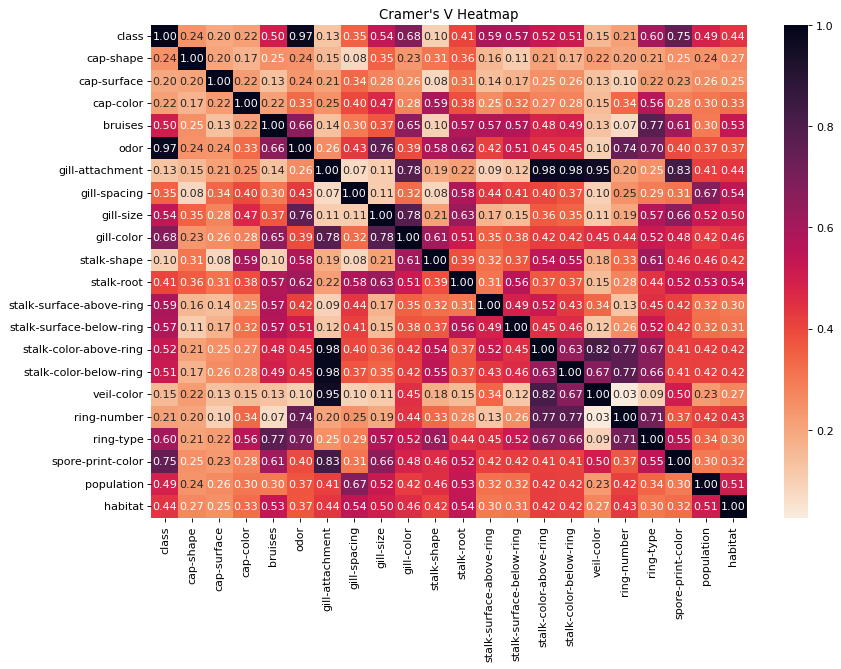

In [12]:
category_labels = data.columns.tolist()
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="rocket_r",
            xticklabels=category_labels, yticklabels=category_labels)  
plt.title("Cramer's V Heatmap")
plt.show()

Analysis reveals a spectrum of correlations within the data, ranging from weak to strong positive associations. This suggests that the variables likely complement and inform each other, potentially providing a comprehensive picture of the underlying phenomenon.  

---

## Step 3: Premodelling Phase

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,classification_report, RocCurveDisplay, ConfusionMatrixDisplay 

#### Separating Independent Variables and Target.

In [14]:
X = data.drop(['class'],axis=1)
y = data['class']

#### Encoding Our Data.

In [15]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
le = LabelEncoder()

y = le.fit_transform(y)
print(y)

[1 0 0 ... 0 1 0]


For y variable encoding is done as Poisonous (p) = 1 Edible (e) = 0

#### Splitting the Data. 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The data is categorical so we are not going to standradize it.

---

## Step 4: Modelling 
We are going to use an Artifical Neural Network for classification with with 2 layers with rectifier activation function and sigmoid in the output layer.

In [18]:
import tensorflow as tf

In [19]:
ann = tf.keras.models.Sequential()

First Hidden Layer

In [20]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))

Second Hidden Layer

In [21]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))

Output Layer

In [22]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Compiling and Training the ANN

In [23]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
ann.fit(X_train,y_train,batch_size=32,epochs=15)

Epoch 1/15
204/204 [==============================] - 2s 2ms/step - loss: 0.6382 - accuracy: 0.5687
Epoch 2/15
204/204 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.6875
Epoch 3/15
204/204 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7387
Epoch 4/15
204/204 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.7806
Epoch 5/15
204/204 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.7929
Epoch 6/15
204/204 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8137
Epoch 7/15
204/204 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8260
Epoch 8/15
204/204 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8378
Epoch 9/15
204/204 [==============================] - 0s 2ms/step - loss: 0.2763 - accuracy: 0.8307
Epoch 10/15
204/204 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8331

The ANN acheive 88.34% train accuracy which is pretty good and not signs of overfitting in the data, lets see how our model acts on the test data.

In [25]:
y_pred = ann.predict(X_test)

51/51 [==============================] - 0s 1ms/step


In [26]:
y_pred

array([[9.8855585e-01],
       [5.6517852e-08],
       [6.5837031e-07],
       ...,
       [9.9978906e-01],
       [2.3236043e-05],
       [3.1455777e-06]], dtype=float32)

In [27]:
y_pred = (y_pred > 0.5).astype(int)

y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

#### Model Evaluation.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



<Axes: >

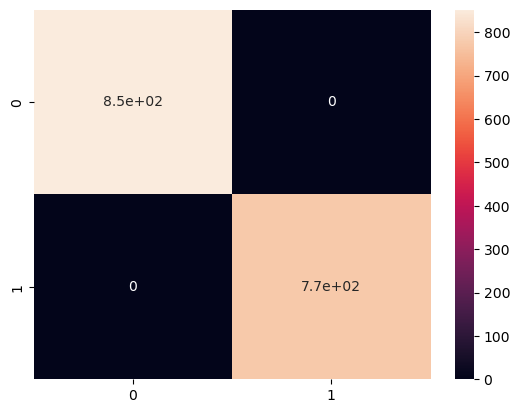

In [28]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

**Our Artificial Neural Network performed exceptionally in the test data which means the model is good on its own and we don't have an overfitting case.**

#### Evaluating the model using different test splits.

In [29]:
#%pip install scikeras[tensorflow]

In [36]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense 
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 15,batch_size=32)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

C:\Users\Divo\AppData\Local\Temp\ipykernel_6820\1406943061.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 15,batch_size=32)


Epoch 1/15
163/163 [==============================] - 2s 3ms/step - loss: 0.5559 - accuracy: 0.7636
Epoch 2/15
163/163 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9740
Epoch 3/15
163/163 [==============================] - 1s 3ms/step - loss: 0.0341 - accuracy: 0.9940
Epoch 4/15
163/163 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9981
Epoch 5/15
163/163 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 0.9990
Epoch 6/15
163/163 [==============================] - 1s 5ms/step - loss: 0.0063 - accuracy: 0.9994
Epoch 7/15
163/163 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 8/15
163/163 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 9/15
163/163 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/15
163/163 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000

Our model evaluation results indicate `1 Accuracy mean` and `0 Accuracy Variance`, suggesting that the model's predictions were consistent across the test data. This is further supported by the following graphs, which visually represent the training and validation accuracy curves, along with the corresponding training and validation loss curves.

In [42]:

history = classifier.fit(X_test, y_test, validation_split=0.20, epochs=15, batch_size=32, verbose=1)
print(history.history)

Epoch 1/15
41/41 [==============================] - 1s 7ms/step - loss: 0.6897 - accuracy: 0.6138 - val_loss: 0.6775 - val_accuracy: 0.9138
Epoch 2/15
41/41 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.8969 - val_loss: 0.5371 - val_accuracy: 0.9138
Epoch 3/15
41/41 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.9115 - val_loss: 0.2758 - val_accuracy: 0.9292
Epoch 4/15
41/41 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9338 - val_loss: 0.1406 - val_accuracy: 0.9662
Epoch 5/15
41/41 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.9677 - val_loss: 0.0852 - val_accuracy: 0.9877
Epoch 6/15
41/41 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9777 - val_loss: 0.0567 - val_accuracy: 0.9877
Epoch 7/15
41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9892 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 8/15
41/41 [==

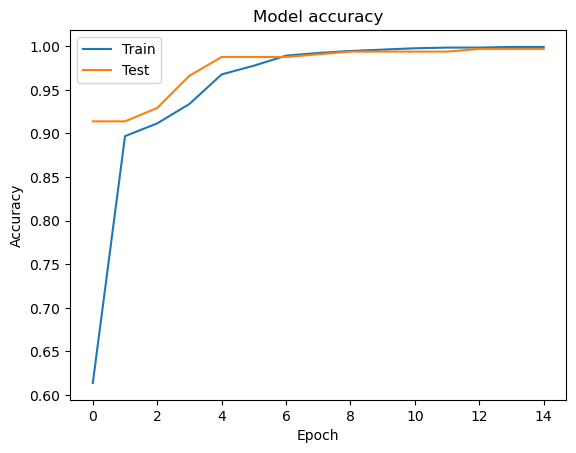

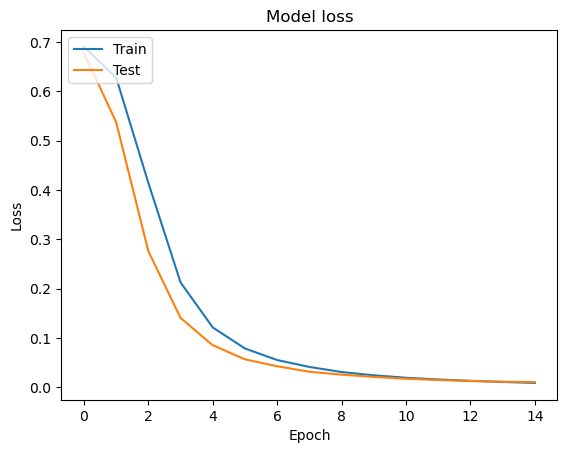

In [43]:

# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Conclusion
High accuracy and low loss even after trying different test splits indicate that this data is simple and well-structured with clear patterns that lead to high accuracy.